Loading the dataset

In [2]:
import pandas as pd
data_set= pd.read_csv("tips_dataset.csv")
data_set.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Looking at the size of the dataset

In [3]:
data_set.shape

(244, 7)

getting familiarized with the dataset

In [4]:
data_set.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
data_set.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
data_set.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Visualizing the dataset

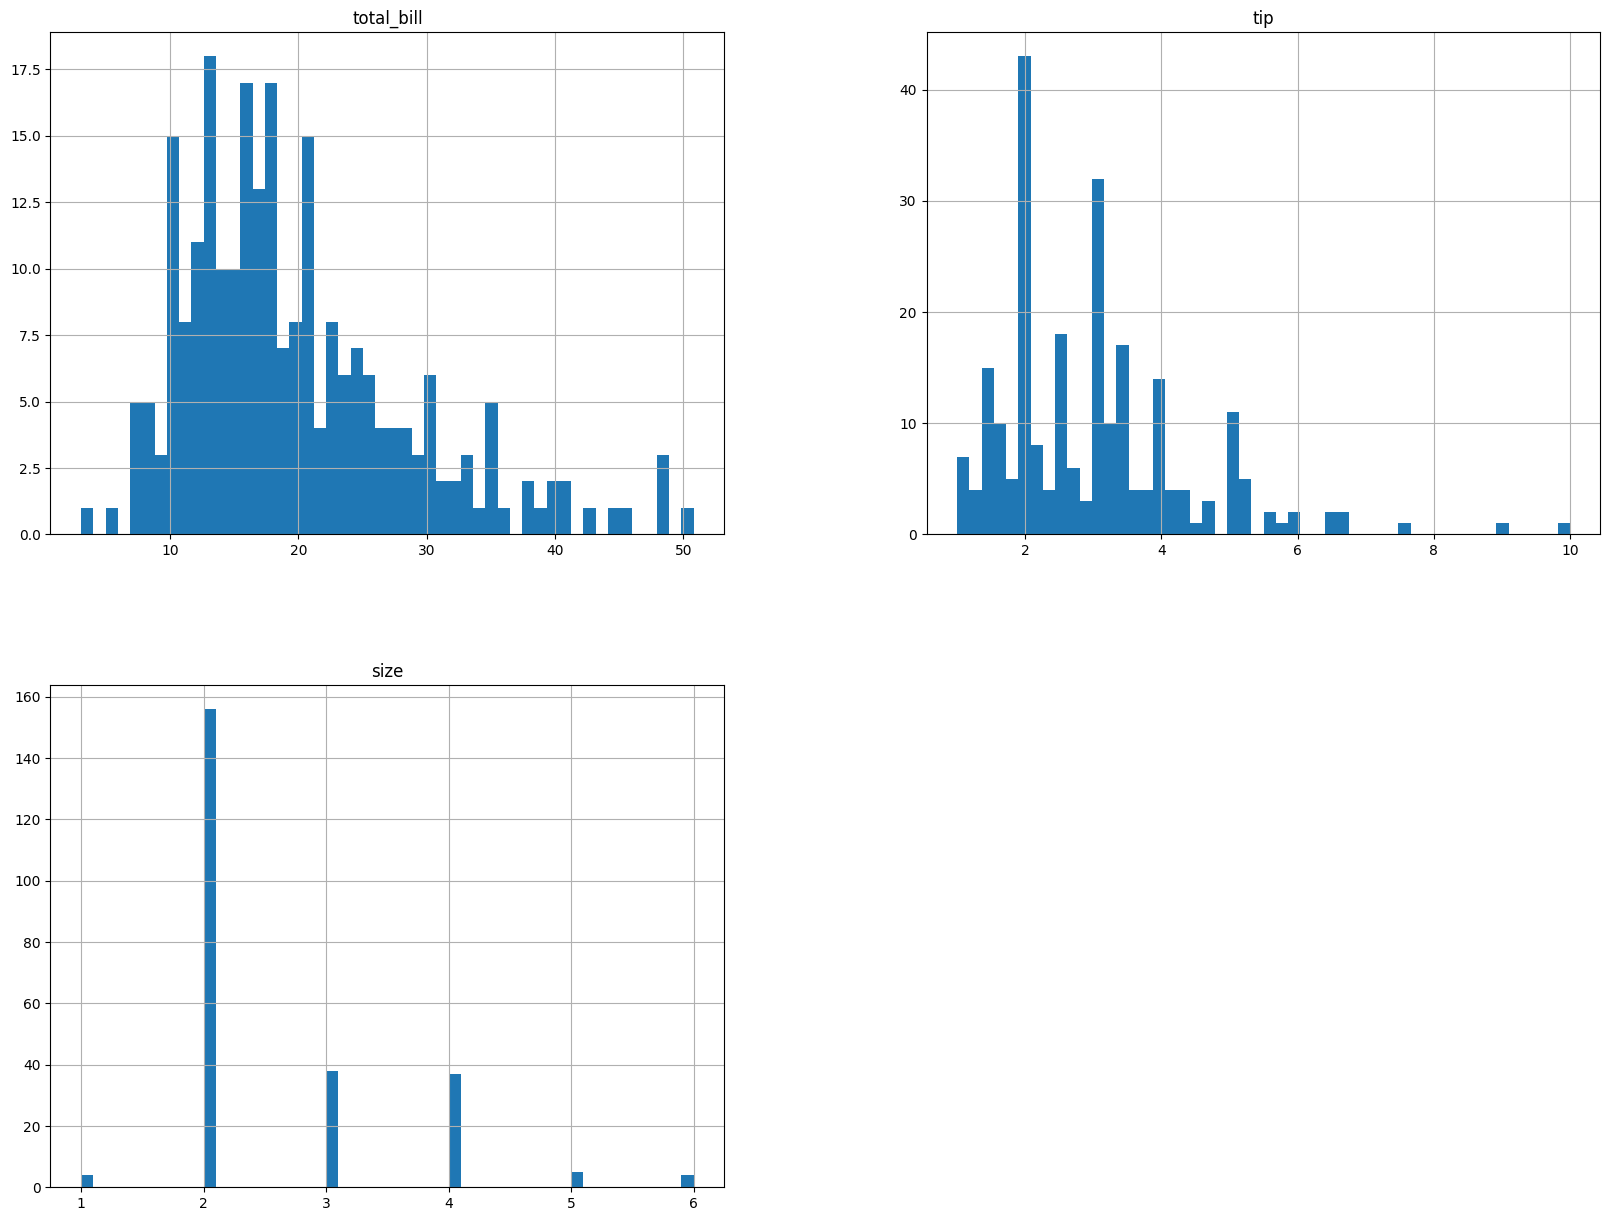

In [7]:
import matplotlib.pyplot as plt
data_set.hist(bins=50, figsize=(20,15))
plt.show()

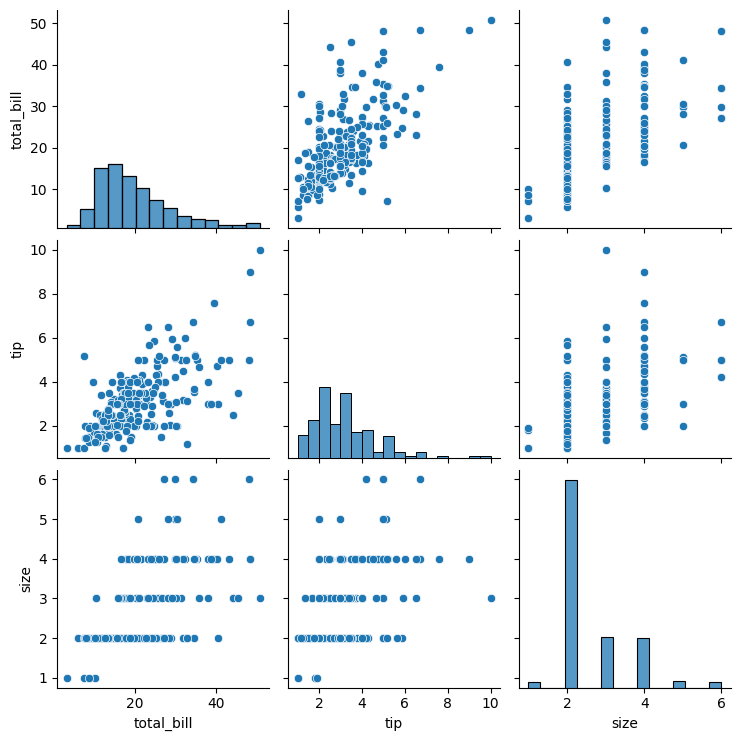

In [8]:
import seaborn as sns 

sns.pairplot(data_set)

plt.show()

Manipulating data

In [10]:
data_set_encoded = pd.get_dummies(data_set, drop_first=True) # converting string type data
# manipulating data before split to avoid any miss match later
# Define features and target
X = data_set_encoded.drop("tip", axis=1)
y = data_set_encoded["tip"]

data_set_encoded.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


Spliting dataset

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


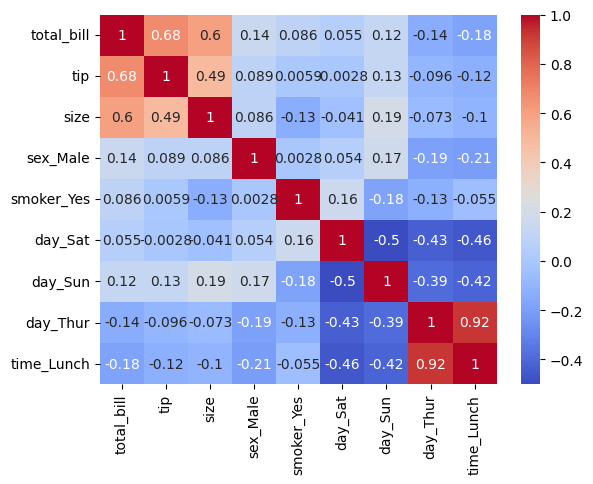

In [13]:
sns.heatmap(data_set_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()
# seeing this chart we can see that other than size and total_bill other attributes can be dropped 

In [19]:
# as there are many ways two solve it using all features my(model may overfit)
#or we could only use features with strong corr

# so going through each one 

from sklearn.linear_model import LinearRegression

model_allf = LinearRegression()
model_allf.fit(x_train,y_train)

# model with strong corr
model_sc = LinearRegression()
X_top = X[['total_bill', 'size']]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)
model_sc= LinearRegression().fit(X_train_top, y_train_top)


Testing Both models to find the best

In [22]:
from sklearn.metrics import mean_squared_error
# for model with all features 
y_predict_allf = model_allf.predict(x_test)
print("All Features - MSE:", mean_squared_error(y_test, y_predict_allf))

# for model with limited features
y_predict_top = model_sc.predict(X_test_top)
print("limted Features - MSE:", mean_squared_error(y_test, y_predict_top))

All Features - MSE: 0.7033566017436106
limted Features - MSE: 0.6485996190543518


Visualizing results 

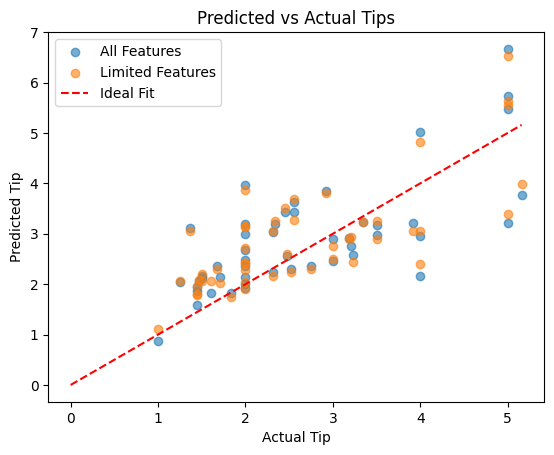

In [23]:

plt.scatter(y_test, y_predict_allf, alpha=0.6, label='All Features')
plt.scatter(y_test, y_predict_top, alpha=0.6, label='Limited Features')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label='Ideal Fit')
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Predicted vs Actual Tips")
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X[['total_bill', 'size']], y, scoring='neg_mean_squared_error', cv=5)
print("cross validation mean squared error:", -scores.mean())


cross validation mean squared error: 1.0434556136475244


In [28]:
print("Mean tip:", y.mean())
print("Standard deviation of tips:", y.std())
mse = mean_squared_error(y_test_top, y_predict_top,)

import numpy as np
rmse = np.sqrt(mse)
print("rmse value",rmse)

Mean tip: 2.99827868852459
Standard deviation of tips: 1.3836381890011822
rmse value 0.8053568271607013
